## Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

### Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Этапы работы над проектом:

1. Изучить данные. Провести подготовку данных к моделированию.
2. Обучить модель для каждого региона geo_data_0, geo_data_1 и geo_data_2.
3. Составить функцию расчета прибыли в регионе.
4. Посчитать прибыль и риски за каждый регион и обосновать выбор региона.
5. Оформить проект и сделать выводы.

## 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore') #PYTHONWARNINGS="ignore"

In [2]:
geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')

In [3]:
geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')

In [4]:
geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [5]:
# функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.T.sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


# функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 1)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df


# функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', len(df_data))
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

# просмотр данных столбца: уникальные значения, тип данных, кол-во пропусков
def preprocessing(column):
    #print(column, '-', dict_name[column])
    print('Тип данных', df[column].dtypes)
    print('Количество пропусков',df[column].isna().sum())
    if df[column].dtypes != 'object':
        print('Минимальное значение:',df[column].min(), 'Максимальное значение:', df[column].max() )
    print('Уникальные значения:', '\n', df[column].value_counts())

In [6]:
df_info(geo_data_0)

Количество строк файла: 100000

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
f0,"[0.7057449842080644, 1.3347112926051892, 1.022...",float64,100000
f1,"[-0.4978225001976334, -0.3401642528583136, 0.1...",float64,100000
f2,"[1.22116994843607, 4.3650803324282, 1.41992623...",float64,100000
product,"[105.28006184349584, 73.03775026515737, 85.265...",float64,100000
id,"[txEyH, 2acmU, 409Wp, iJLyR, Xdl7t, wX4Hy, tL6...",object,99990



Информация о пропусках данных:


,column_name,num_missing,percent_missing
id,id,0,0.0
f0,f0,0,0.0
f1,f1,0,0.0
f2,f2,0,0.0
product,product,0,0.0



Первые пять строк таблицы:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [7]:
df_info(geo_data_1)

Количество строк файла: 100000

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
f0,"[-15.00134818249185, 14.272087811011149, 6.263...",float64,100000
f1,"[-8.275999947188001, -3.47508321506002, -5.948...",float64,100000
f2,"[-0.0058760136933206, 0.9991827365665829, 5.00...",float64,100000
product,"[3.179102583207246, 26.95326103153969, 134.766...",float64,12
id,"[kBEdx, 62mP7, vyE1P, KcrkZ, AHL4O, HHckp, h5U...",object,99996



Информация о пропусках данных:


,column_name,num_missing,percent_missing
id,id,0,0.0
f0,f0,0,0.0
f1,f1,0,0.0
f2,f2,0,0.0
product,product,0,0.0



Первые пять строк таблицы:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df_info(geo_data_2)

Количество строк файла: 100000

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
f0,"[-1.1469870984179529, 0.2627779016539684, 0.19...",float64,100000
f1,"[0.9633279217162892, 0.2698389572803021, 0.289...",float64,100000
f2,"[-0.8289649221710994, -2.530186515492004, -5.5...",float64,100000
product,"[27.75867323073004, 56.06969663239464, 62.8719...",float64,100000
id,"[fwXo0, WJtFt, ovLUW, q6cA6, WPMUX, LzZXx, WBH...",object,99996



Информация о пропусках данных:


,column_name,num_missing,percent_missing
id,id,0,0.0
f0,f0,0,0.0
f1,f1,0,0.0
f2,f2,0,0.0
product,product,0,0.0



Первые пять строк таблицы:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


В данных отсутсвуют пропуски. Удалим из каждого датафрейма столбец id. Он не несет значимости для для модели.

In [9]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [10]:
def check_zeros(df, target_name):
    zeros = df[df[target_name] == 0][target_name].count()
    percent = zeros / df.shape[0]
    print('Количество нулевых значений -', zeros)
    print('Процент нулевых значений -', percent)

In [11]:
check_zeros(geo_data_0, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [12]:
check_zeros(geo_data_1, 'product')

Количество нулевых значений - 8235
Процент нулевых значений - 0.08235


In [13]:
check_zeros(geo_data_2, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 1e-05


In [14]:
geo_data_0[geo_data_0['product'] == 0]

,f0,f1,f2,product
57263,-0.702064,0.375992,0.236572,0.0


In [15]:
geo_data_1[geo_data_1['product'] == 0]

,f0,f1,f2,product
11,16.320755,-0.562946,-0.001783,0.0
13,6.695604,-0.749449,-0.007630,0.0
62,21.418478,-5.134490,-0.002836,0.0
63,6.822701,3.104979,-0.000723,0.0
77,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...
99936,5.085749,-3.980305,0.005063,0.0
99948,8.277805,-9.178818,0.003275,0.0
99956,13.343983,-1.290200,0.005980,0.0
99961,13.854163,-11.528089,-0.005556,0.0


In [16]:
geo_data_2[geo_data_2['product'] == 0]

,f0,f1,f2,product
68149,-0.865596,-1.615247,-4.126441,0.0


Изучим гистограммы по столбцу product.

In [17]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[7,5])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

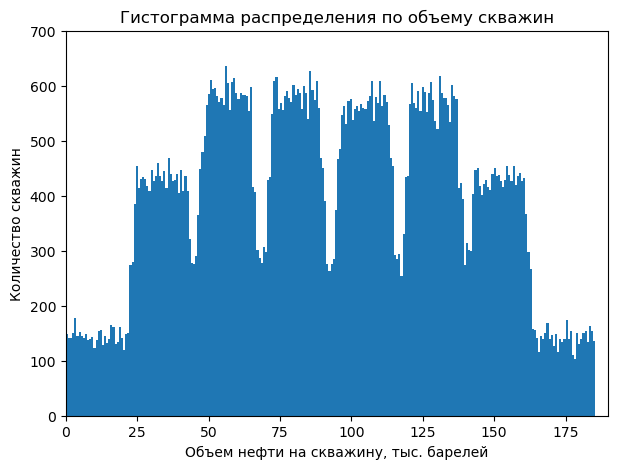

In [57]:
oil_hist(geo_data_0['product'], 250, 190, 700)

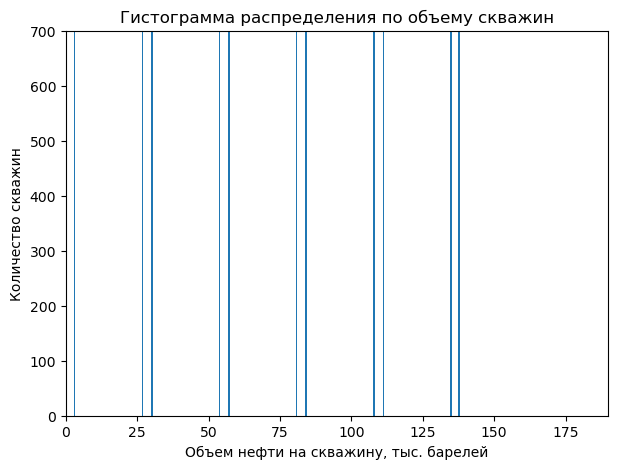

In [19]:
oil_hist(geo_data_1['product'], 250, 190, 700)

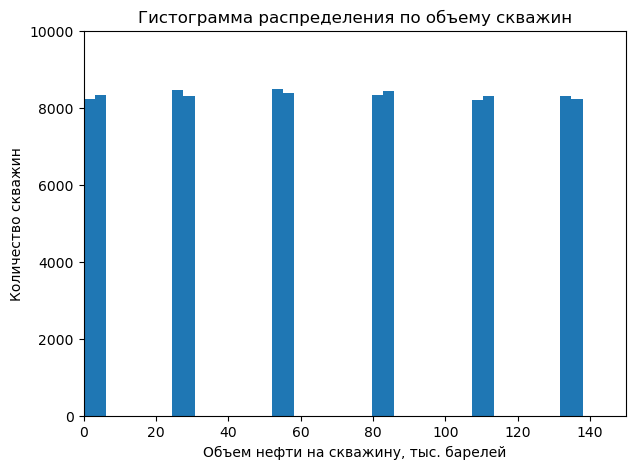

In [20]:
oil_hist(geo_data_1['product'], 45, 150, 10000)

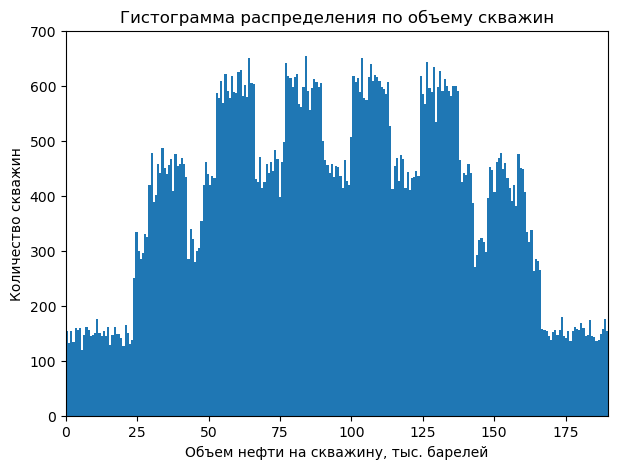

In [21]:
oil_hist(geo_data_2['product'], 250, 190, 700)

Признаки для модели: 
- f0;
- f1; 
- f2.

Целевой признак: 
- product.

<b>Вывод по шагу 1.</b>

Данные готовы к обучению.

Во втором месторождении около 8,2% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего региона можно понять, что были утеряны данные или не было исследовано количество барелей нефти.

По гистограммам можно понять, что у первого и третьего региона распределение скважин близкое к нормальному. Во втором регионе данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно.

## 2. Обучение и проверка модели

Проверим качество модели линейной регрессии с текущим значением признаков и с масштабируемыми. 

Проведем исследование на geo_data_0.

### 2.1 Выполним разбивку неподготовленного датасета:

In [22]:
def test_split(df, target):
    X = df.drop([target], axis=1)
    y = df[target]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    
    return X_train, X_val, y_train, y_val

In [23]:
X_train_0, X_valid_0, y_train_0, y_valid_0 = test_split(geo_data_0, 'product')

X_train_0.head()

,f0,f1,f2
98980,1.611925,-0.151874,1.221668
69824,-0.896203,0.369086,-4.537914
9928,0.217569,0.974254,7.369521
75599,0.882945,0.669249,3.114527
95621,-0.941661,0.634162,2.873607


In [24]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = test_split(geo_data_1, 'product')

X_train_1.head()

,f0,f1,f2
98980,9.296378,-4.480220,1.999544
69824,15.836796,1.952969,4.989288
9928,-1.594937,-0.407367,3.003358
75599,12.335752,-6.508978,2.001396
95621,-4.954638,-8.026328,1.001472


In [25]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = test_split(geo_data_2, 'product')

X_train_2.head()

,f0,f1,f2
98980,-0.592927,-2.323059,5.344840
69824,-0.690844,1.715501,-1.331142
9928,1.741680,-1.604639,0.499745
75599,-1.354850,0.984588,5.683113
95621,1.075114,1.175117,1.010025


###  2.2 Выполним разбивку и проведем масштабирование

In [26]:
def test_split_scaled(df, numeric, target):
    geo_data_s = df.copy()

    X_s = geo_data_s.drop([target] , axis=1)
    y_s = geo_data_s[target]

    X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_s, y_s, test_size=0.25, random_state=42)

    scaler = StandardScaler()
    scaler.fit(X_train_s[numeric])
    X_train_s[numeric] = scaler.transform(X_train_s[numeric])
    X_val_s[numeric] = scaler.transform(X_val_s[numeric])

    return X_train_s, X_val_s, y_train_s, y_val_s

In [27]:
X_train_0s, X_val_0s, y_train_0s, y_val_0s = test_split_scaled(geo_data_0, ['f0', 'f1', 'f2'], 'product')

X_train_0s.head()

,f0,f1,f2
98980,1.274786,-0.799739,-0.396677
69824,-1.600689,0.234678,-2.169283
9928,-0.323791,1.436297,1.495425
75599,0.439038,0.830679,0.185881
95621,-1.652805,0.761012,0.111734


In [28]:
X_train_1s, X_val_1s, y_train_1s, y_val_1s = test_split_scaled(geo_data_1, ['f0', 'f1', 'f2'], 'product')

X_train_1s.head()

,f0,f1,f2
98980,0.911229,0.063780,-0.291331
69824,1.640885,1.320793,1.463778
9928,-0.303818,0.859595,0.297952
75599,1.250304,-0.332629,-0.290244
95621,-0.678630,-0.629111,-0.877242


In [29]:
X_train_2s, X_val_2s, y_train_2s, y_val_2s = test_split_scaled(geo_data_2, ['f0', 'f1', 'f2'], 'product')

X_train_2s.head()

,f0,f1,f2
98980,-0.343864,-1.338311,0.817572
69824,-0.400431,0.993613,-1.102974
9928,1.004849,-0.923485,-0.576264
75599,-0.784031,0.571573,0.914886
95621,0.619771,0.681588,-0.429467


###  2.3 Проверим каково RMSE на маштабированных данных и нет

In [30]:
model = LinearRegression()

In [31]:
X_train_0, X_val_0, y_train_0, y_val_0 = test_split(geo_data_0, 'product')
model.fit(X_train_0, y_train_0)
predicted_y_0 = model.predict(X_val_0)
print('RMSE -', mean_squared_error(y_val_0, predicted_y_0)**0.5)

X_train_0s, X_val_0s, y_train_0s, y_val_0s = test_split_scaled(geo_data_0, ['f0', 'f1', 'f2'], 'product')
model.fit(X_train_0s, y_train_0s)
predicted_y_0s = model.predict(X_val_0s)
print('RMSE -', mean_squared_error(y_val_0s, predicted_y_0s)**0.5)

RMSE - 37.75660035026169
RMSE - 37.75660035026169


In [32]:
X_train_1, X_val_1, y_train_1, y_val_1 = test_split(geo_data_1, 'product')
model.fit(X_train_1, y_train_1)
predicted_y_1 = model.predict(X_val_1)
print('RMSE -', mean_squared_error(y_val_1, predicted_y_1)**0.5)

X_train_1s, X_val_1s, y_train_1s, y_val_1s = test_split_scaled(geo_data_1, ['f0', 'f1', 'f2'], 'product')
model.fit(X_train_1s, y_train_1s)
predicted_y_1s = model.predict(X_val_1s)
print('RMSE -', mean_squared_error(y_val_1s, predicted_y_1s)**0.5)

RMSE - 0.8902801001028842
RMSE - 0.8902801001028842


In [33]:
X_train_2, X_val_2, y_train_2, y_val_2 = test_split(geo_data_2, 'product')
model.fit(X_train_2, y_train_2)
predicted_y_2 = model.predict(X_val_2)
print('RMSE -', mean_squared_error(y_val_2, predicted_y_2)**0.5)

X_train_2s, X_val_2s, y_train_2s, y_val_2s = test_split_scaled(geo_data_2, ['f0', 'f1', 'f2'], 'product')
model.fit(X_train_2s, y_train_2s)
predicted_y_2s = model.predict(X_val_2s)
print('RMSE -', mean_squared_error(y_val_2s, predicted_y_2s)**0.5)

RMSE - 40.14587231134218
RMSE - 40.145872311342174


<b>Масштабирование данных не требуется.

###  2.4 Проверим показатель RMSE при других гиперпараметрах модели.

In [34]:
model = LinearRegression(normalize=True)
model.fit(X_train_0, y_train_0)
predicted_y_0 = model.predict(X_val_0)
print('RMSE -', mean_squared_error(y_val_0, predicted_y_0)**0.5)

RMSE - 37.75660035026169


In [67]:
#Присутствует ли свободный член модели или нет, если нет то прямая обязана пройти чз начало координат 
model = LinearRegression(fit_intercept=True)
model.fit(X_train_0, y_train_0)
predicted_y_0 = model.predict(X_val_0)
print('RMSE -', mean_squared_error(y_val_0, predicted_y_0)**0.5)
model.intercept_

RMSE - 37.75660035026169


77.66624978042199

<b>Изменение стандартных значений гиперпараметров не улучшило модель. 

### 2.5 Расчитаем предсказанный запас и реальным, а так же выведем RMSE.

In [68]:
model = LinearRegression()

def oil_predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    pred_oil_sum = data_frame['predicted_product'].sum()
    real_oil_sum = data_frame['real_product'].sum()
    return data_frame, rmse, mean, pred_oil_sum, real_oil_sum 

In [70]:
geo_data_0_predicted, geo_data_0_rmse, geo_data_0_predicted_mean, geo_data_0_predicted_sum, geo_data_0_real_sum = oil_predict(geo_data_0, 'product')
display(geo_data_0_predicted.head())
print('RMSE -', geo_data_0_rmse)
print('Средний запас предсказанного сырья -', geo_data_0_predicted_mean)

,real_product,predicted_product
75721,122.073350,101.901017
80184,48.738540,78.217774
19864,131.338088,115.266901
76699,88.327757,105.618618
92991,36.959266,97.980185


RMSE - 37.75660035026169
Средний запас предсказанного сырья - 92.3987999065781


In [69]:
geo_data_1_predicted, geo_data_1_rmse, geo_data_1_predicted_mean, geo_data_1_predicted_sum, geo_data_1_real_sum = oil_predict(geo_data_1, 'product')
display(geo_data_1_predicted.head())
print('RMSE -', geo_data_1_rmse)
print('Средний запас предсказанного сырья -', geo_data_1_predicted_mean)

,real_product,predicted_product
75721,0.000000,0.844738
80184,53.906522,52.921612
19864,134.766305,135.110385
76699,107.813044,109.494863
92991,0.000000,-0.047292


RMSE - 0.8902801001028842
Средний запас предсказанного сырья - 68.71287803913762


In [71]:
geo_data_2_predicted, geo_data_2_rmse, geo_data_2_predicted_mean, geo_data_2_predicted_sum, geo_data_2_real_sum = oil_predict(geo_data_2, 'product')
display(geo_data_2_predicted.head())
print('RMSE -', geo_data_2_rmse)
print('Средний запас предсказанного сырья -', geo_data_2_predicted_mean)

,real_product,predicted_product
75721,117.441301,98.301916
80184,47.841249,101.592461
19864,45.883483,52.449099
76699,139.014608,109.922127
92991,84.004276,72.411847


RMSE - 40.14587231134218
Средний запас предсказанного сырья - 94.77102387765993


In [40]:
results = [[geo_data_0_real_sum, geo_data_1_real_sum, geo_data_2_real_sum], \
           [geo_data_0_predicted_sum, geo_data_1_predicted_sum, geo_data_2_predicted_sum], \
           [geo_data_0_predicted_mean, geo_data_1_predicted_mean, geo_data_2_predicted_mean], \
           [geo_data_0_rmse, geo_data_1_rmse, geo_data_2_rmse]]

result_df = pd.DataFrame(results,
                         columns=['Регион 1', 'Регион 2', 'Регион 3'],
                         index=['Суммарный реальный запас', 'Суммарный предсказанный запас', \
                                'Среднее по региону на валидационной выборке', 'RMSE на валидационной выборке'])
result_df

,Регион 1,Регион 2,Регион 3
Суммарный реальный запас,2.313396e+06,1.706710e+06,2.378822e+06
Суммарный предсказанный запас,2.313155e+06,1.706955e+06,2.373574e+06
Среднее по региону на валидационной выборке,9.252621e+01,6.827820e+01,9.494294e+01
RMSE на валидационной выборке,3.740196e+01,8.874258e-01,4.018553e+01


### Вывод по разделу 3 

Данные были разбиты на тренировочную и валидационную выборку в соотношении 3 к 1, после чего модель была обучена отдельно по каждому региону и получены предсказания, которые показали, что в первом и третьем регионе среднее объем запасов гораздо больше чем во втором, но модель во втором регионе работает гораздо лучше остальных и предсказывает объем с очень малой ошибкой.

Возможно утеряные данные из второго региона сказались на модели и она достаточно сильно переобучилась.

Но из-за утери данных и малого запаса в среднем на меторождение не имеет смысла рассматривать второе месторождение как прибыльное.

Изучим все регионы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 регионом.

## 3. Подготовка к расчету прибыли

In [41]:
# Мы расчитываем прибыль в тысячах рублей за тысячу барелей, поэтому 1 милиард сохранен таким образом 
budget = 1e+07 
chosen_points = 500
best_points = 200
price_per_barrel = 450

Расчитаем безубыточную разработку сырья на 200 месторождениях. И найдем среднее количество продукта в месторождениях необходимое для этого.


In [42]:
average_profit_per_point = budget / best_points
print('Стоимость разработки одной скважины:', average_profit_per_point, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / price_per_barrel
print('Минимальный объем сырья для безубыточной разработки скважины: {:.4}'.format(average_barrels_per_point), 'тыс. барелей')

average_barrels = budget / price_per_barrel
print('Минимальный объем нефти на регион для безубыточной разработки: {:.7}'.format(average_barrels), 'тыс. барелей')

Стоимость разработки одной скважины: 50000.0 тыс.руб.
Минимальный объем сырья для безубыточной разработки скважины: 111.1 тыс. барелей
Минимальный объем нефти на регион для безубыточной разработки: 22222.22 тыс. барелей


In [73]:
print('Средний запас фактичекой нефти на скважину в регионе 1', round(geo_data_0['product'].mean(), 2))
print('Средний запас фактичекой нефти на скважину в регионе 2', round(geo_data_1['product'].mean(), 2))
print('Средний запас фактичекой нефти на скважину в регионе 3', round(geo_data_2['product'].mean(), 2))

Средний запас фактичекой нефти на скважину в регионе 1 92.5
Средний запас фактичекой нефти на скважину в регионе 2 68.83
Средний запас фактичекой нефти на скважину в регионе 3 95.0


Выведем распределение предсказанных значений.

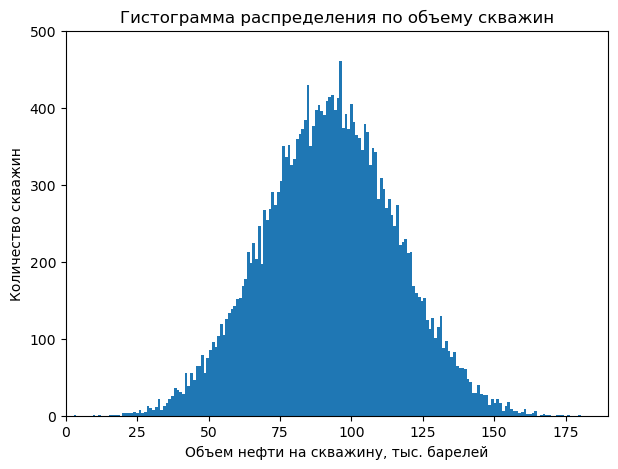

In [44]:
oil_hist(geo_data_0_predicted['predicted_product'], 200, 190, 500)

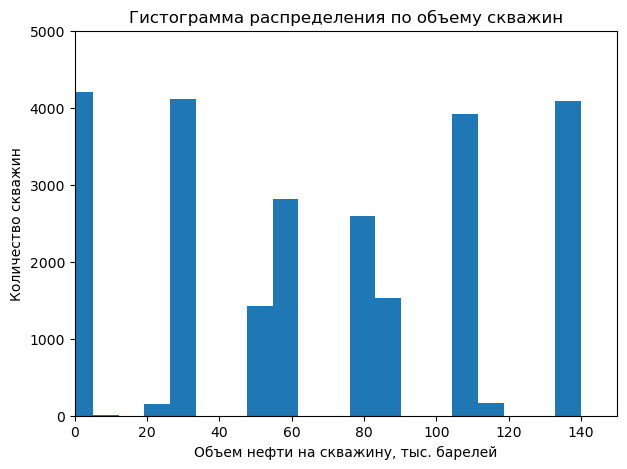

In [45]:
oil_hist(geo_data_1_predicted['predicted_product'], 20, 150, 5000)

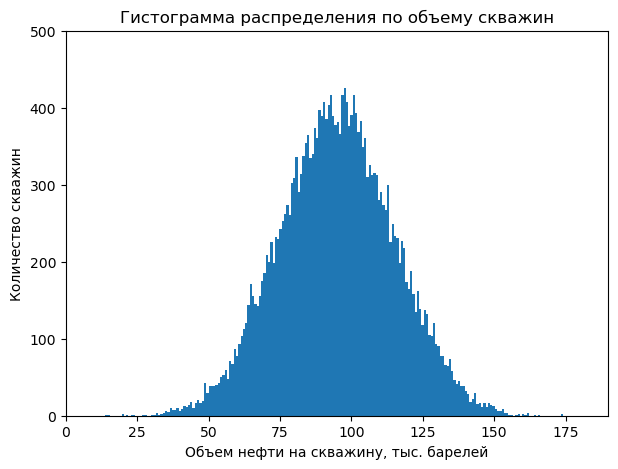

In [46]:
oil_hist(geo_data_2_predicted['predicted_product'], 200, 190, 500)

### Вывод по разделу 3 

Была подготовлена минимальная оценка прибили за скважину и минимальный объем нефти на скважину.

Анализ средних объемов на скважину для каждого региона следующий:

Изучены средние фактические запасы. Для первого и третьего регионов - высока вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

Во втором регионе мб и есть определенный смысл - значений больше 111 достаточно много и при определенной доли везения можно выбрать только лучшие в этой выборке, хотя и среднее значение 68.8.

## 4. Расчёт прибыли и рисков

Создадим функцию для расчета прибыли скважин:

In [47]:
# Мы расчитываем прибыль в тысячах рублей за тысячу барелей, поэтому 1 милиард сохранен таким образом budget = 1e+07 
chosen_points = 500
best_points = 200
price_per_barrel = 450

In [48]:
def oil_profit_calculation(target, probabilities, count):
    
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

In [49]:
state = np.random.RandomState(42)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [50]:
average_0, lower_0, upper_0, risk_0 = bootstrap_1000(geo_data_0_predicted['real_product'], 
                                                     geo_data_0_predicted['predicted_product'])
print('Данные по первому региону:')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Данные по первому региону:
Средняя прибыль по региону = 441523.17 тыс.руб.
95% доверительный интервал от -57678.76 до 971163.89 тыс.руб.
Процент риска 4.50%


In [51]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(geo_data_1_predicted['real_product'], 
                                                     geo_data_1_predicted['predicted_product'])
print('Данные по первому региону:')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по первому региону:
Средняя прибыль по региону = 409191.78 тыс.руб.
95% доверительный интервал от 19612.51 до 823812.82 тыс.руб.
Процент риска 2.20%


In [52]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(geo_data_2_predicted['real_product'], 
                                                     geo_data_2_predicted['predicted_product'])
print('Данные по первому региону:')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по первому региону:
Средняя прибыль по региону = 388631.02 тыс.руб.
95% доверительный интервал от -143833.56 до 927397.86 тыс.руб.
Процент риска 7.60%


### Вывод по разделу 4
+ Можно заметить что при разработке 200 лучших скважин самая высокая прибыль достгиается в первом регионе, хотя среднее у второго региона было значительно ниже, выручка среди лучших оказалась у него выше чем у третьего региона. 


+ Во всех трех регионах при обработке 200 скважин возможен убыток, но во втором он минимален и составляет 2.2 процента, когда как в остальных скважинах он составляет 4.5 и 7.6 процентов, что по-моему мнению достаточно большой риск для бизнеса. 


+ Во втором регионе границы 95%-ого интервала находятся очень близко друг другу и левая граница данного интервала имеет не отрицательное значение, что говорит о том что с 95 процентной вероятностью бизнес будет выходить на достаточно высокую прибыль.

## Общий вывод

При выполнении проекта было выполнено:

1. Изучены данные. Проведена подготовка данных к моделированию.
2. Обучена модель для каждого региона geo_data_0, geo_data_1 и geo_data_2.
3. Составлена функция расчета прибыли в регионе.
4. Посчитана прибыль и риски в каждом регионе, обоснован выбор региона.

Второй регион получился одним из лучших по показателям предсказывания, хотя данные не выглядят нормально распределенными.